In [2]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [3]:
# Create a file path and read in the data for 2013.
import_2013_df = pd.read_csv("AnnualImports/General Imports Customs Value, All Commodities 2013")
import_2013_df.head()

,IMPALL2013,COUNTRY,SCHEDULE
0,45514058,Afghanistan,5310
1,22776586,Albania,4810
2,4830871545,Algeria,7210
3,1428673,Andorra,4271
4,8742942417,Angola,7620


In [11]:
# Create a file path and read in the data for 2014.
import_2014_df = pd.read_csv("AnnualImports/General Imports Customs Value, All Commodities 2014")
import_2014_df.head()

,IMPALL2014,COUNTRY,SCHEDULE
0,74496178,Afghanistan,5310
1,69128617,Albania,4810
2,4628902129,Algeria,7210
3,1277355,Andorra,4271
4,5719811538,Angola,7620


In [5]:
# Create a file path and read in the data for 2015.
import_2015_df = pd.read_csv("AnnualImports/General Imports Customs Value, All Commodities 2015")
import_2015_df.head()

,IMPALL2015,COUNTRY,SCHEDULE
0,23601251,Afghanistan,5310
1,160081219,Albania,4810
2,3371547769,Algeria,7210
3,4847957,Andorra,4271
4,2806494883,Angola,7620


In [6]:
# Create a file path and read in the data for 2016.
import_2016_df = pd.read_csv("AnnualImports/General Imports Customs Value, All Commodities 2016")
import_2016_df.head()

,IMPALL2016,COUNTRY,SCHEDULE
0,33715666,Afghanistan,5310
1,124614040,Albania,4810
2,3227920172,Algeria,7210
3,6610069,Andorra,4271
4,2855572443,Angola,7620


In [7]:
# Create a file path and read in the data for 2017.
import_2017_df = pd.read_csv("AnnualImports/General Imports Customs Value, All Commodities 2017")
import_2017_df.head()

,IMPALL2017,COUNTRY,SCHEDULE
0,14423622,Afghanistan,5310
1,41596733,Albania,4810
2,3805619792,Algeria,7210
3,13694429,Andorra,4271
4,2603653399,Angola,7620


In [8]:
# Create a file path and read in the data for 2018.
import_2018_df = pd.read_csv("AnnualImports/General Imports Customs Value, All Commodities 2018")
import_2018_df.head()

,IMPALL2018,COUNTRY,SCHEDULE
0,28915075,Afghanistan,5310
1,68025429,Albania,4810
2,4618350007,Algeria,7210
3,16013879,Andorra,4271
4,2698363854,Angola,7620


In [14]:
#merge the dataframes on the country column and schedule column
allyears_imports_df = import_2013_df.merge(import_2014_df, on=['COUNTRY','SCHEDULE'], how='outer')
allyears_imports_df = allyears_imports_df.merge(import_2015_df, on=['COUNTRY','SCHEDULE'], how='outer')
allyears_imports_df = allyears_imports_df.merge(import_2016_df, on=['COUNTRY','SCHEDULE'], how='outer')
allyears_imports_df = allyears_imports_df.merge(import_2017_df, on=['COUNTRY','SCHEDULE'], how='outer')
allyears_imports_df = allyears_imports_df.merge(import_2018_df, on=['COUNTRY','SCHEDULE'], how='outer')

#remove schedule column
allyears_imports_df.drop('SCHEDULE', axis=1, inplace=True)

#reorder columns to have country first
allyears_imports_df = allyears_imports_df.reindex(columns=['COUNTRY', 'IMPALL2013', 'IMPALL2014', 'IMPALL2015', 'IMPALL2016', 'IMPALL2017', 'IMPALL2018'])

#set the country as the index
allyears_imports_df.set_index('COUNTRY', inplace=True)

#create a new column with the total exports for each country from 2013-2018
allyears_imports_df['Sum'] = allyears_imports_df.sum(axis=1)

#sort by the total amount exported from 2013-2108 with the largest total first.
allyears_imports_df = allyears_imports_df.sort_values(by='Sum', ascending=False)

#get the sum of the sum column
total_imports = allyears_imports_df['Sum'].sum()

#create a column with the % of total imports for each country
allyears_imports_df['% of Total Imports'] = ((allyears_imports_df['Sum']/ total_imports)*100).round(2)

allyears_imports_df

,IMPALL2013,IMPALL2014,IMPALL2015,IMPALL2016,IMPALL2017,IMPALL2018,Sum,% of Total Imports
COUNTRY,,,,,,,,
China,NaN,NaN,483201655364,462542004554,505469954379,539503427742,1.990717e+12,21.36
Mexico,NaN,NaN,296433325024,293923947660,314267299235,346527738621,1.251152e+12,13.42
Canada,NaN,NaN,296305080863,277782254650,299319385870,318481082527,1.191888e+12,12.79
Japan,NaN,NaN,131445490188,132030346544,136480825868,142596248051,5.425529e+11,5.82
Germany,NaN,NaN,124887804524,114107089169,117575227374,125904141782,4.824743e+11,5.18
...,...,...,...,...,...,...,...,...
Pitcairn Islands,NaN,NaN,12162,5748,39726,18282,7.591800e+04,0.00
Netherlands Antilles (through Apr 2011),NaN,NaN,0,0,0,0,0.000000e+00,0.00
Unidentified Countries,NaN,NaN,0,0,0,0,0.000000e+00,0.00


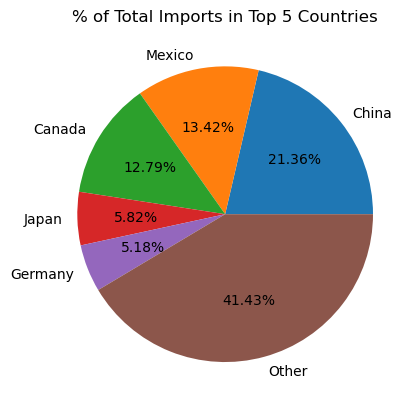

In [20]:
# Create the pie chart
# Labels for the sections of our pie chart
labels = ["China", "Mexico", "Canada", "Japan", "Germany", "Other"]
other = 100 - allyears_imports_df.at['China', '% of Total Imports'] - allyears_imports_df.at['Mexico', '% of Total Imports'] - allyears_imports_df.at['Canada', '% of Total Imports'] - allyears_imports_df.at['Japan', '% of Total Imports'] - allyears_imports_df.at['Germany', '% of Total Imports']

# The values of each section of the pie chart
sizes = [allyears_imports_df.at['China', '% of Total Imports'], allyears_imports_df.at['Mexico', '% of Total Imports'], allyears_imports_df.at['Canada', '% of Total Imports'], allyears_imports_df.at['Japan', '% of Total Imports'], allyears_imports_df.at['Germany', '% of Total Imports'], other]
plt.title("% of Total Imports in Top 5 Countries")
plt.pie(sizes, labels=labels, autopct="%1.2f%%")

plt.savefig('top_import_countries.png')

# Tells matplotlib that we want a pie chart with equal axes
plt.show()